<a href="https://colab.research.google.com/github/Dulavinya/EN3160-ImageProcessing/blob/main/A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving a1images.zip to a1images.zip


In [5]:
import zipfile
import os

# Replace 'images.zip' with your actual zip file name
zip_file = "a1images.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extract to folder named "images"

# Optional: list files extracted
print("Files extracted to 'images/':", os.listdir("images"))


Files extracted to 'images/': ['a1images']


In [6]:
import os

# List the files to confirm
print(os.listdir("images/a1images"))



['emma.jpg', 'einstein.png', 'daisy.jpg', 'spider.png', 'jeniffer.jpg', 'highlights_and_shadows.jpg', 'shells.tif', 'brain_proton_density_slice.png', 'a1q5images']


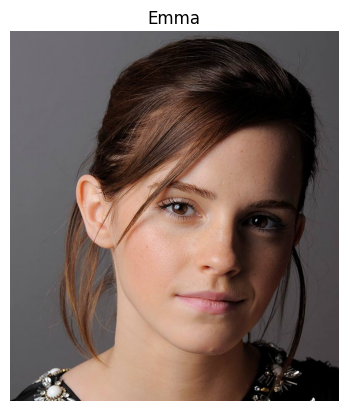

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Now load the image from the extracted folder
img = cv.imread("images/a1images/emma.jpg", cv.IMREAD_UNCHANGED)


if img is None:
    raise FileNotFoundError("Image not found. Check path and filename.")

# Display the image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Emma")
plt.show()


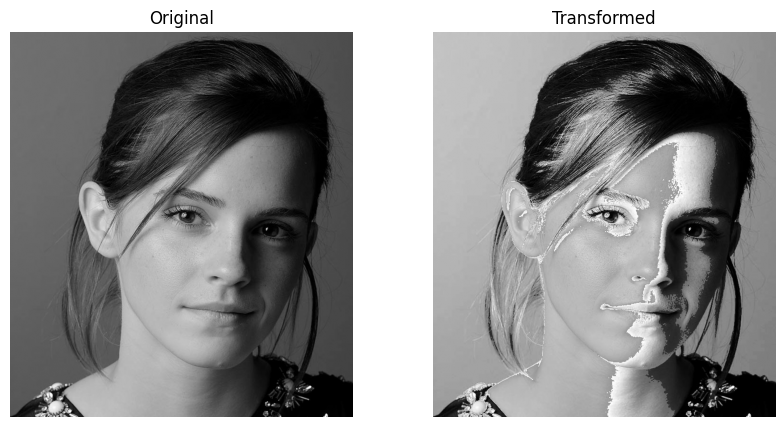

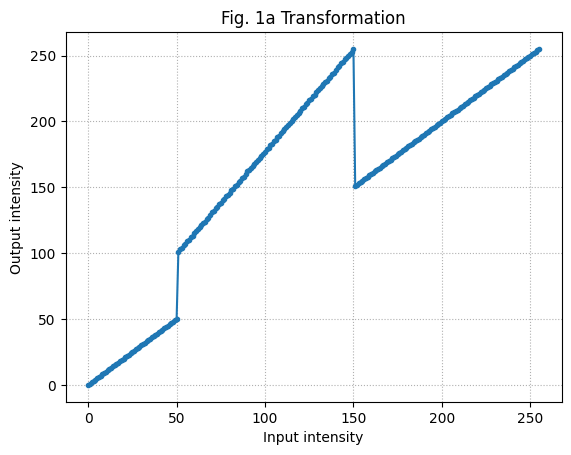

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
f = cv.imread('images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

t1 = np.arange(0, 51)
t2 = np.linspace(100, 255, 101)
t3 = np.arange(150, 256)

# Concatenate into one mapping table and Remove duplicate points at the joins (50 and 150)
T = np.concatenate((t1, t2[1:], t3[1:])).astype(np.uint8)


# Apply transformation

g = T[f]


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(f, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(g, cmap='gray'); plt.title('Transformed'); plt.axis('off')
plt.show()

# Plot transformation function
plt.plot(np.arange(256), T, '-o', markersize=3)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.title("Fig. 1a Transformation")
plt.grid(True, ls=":")
plt.show()

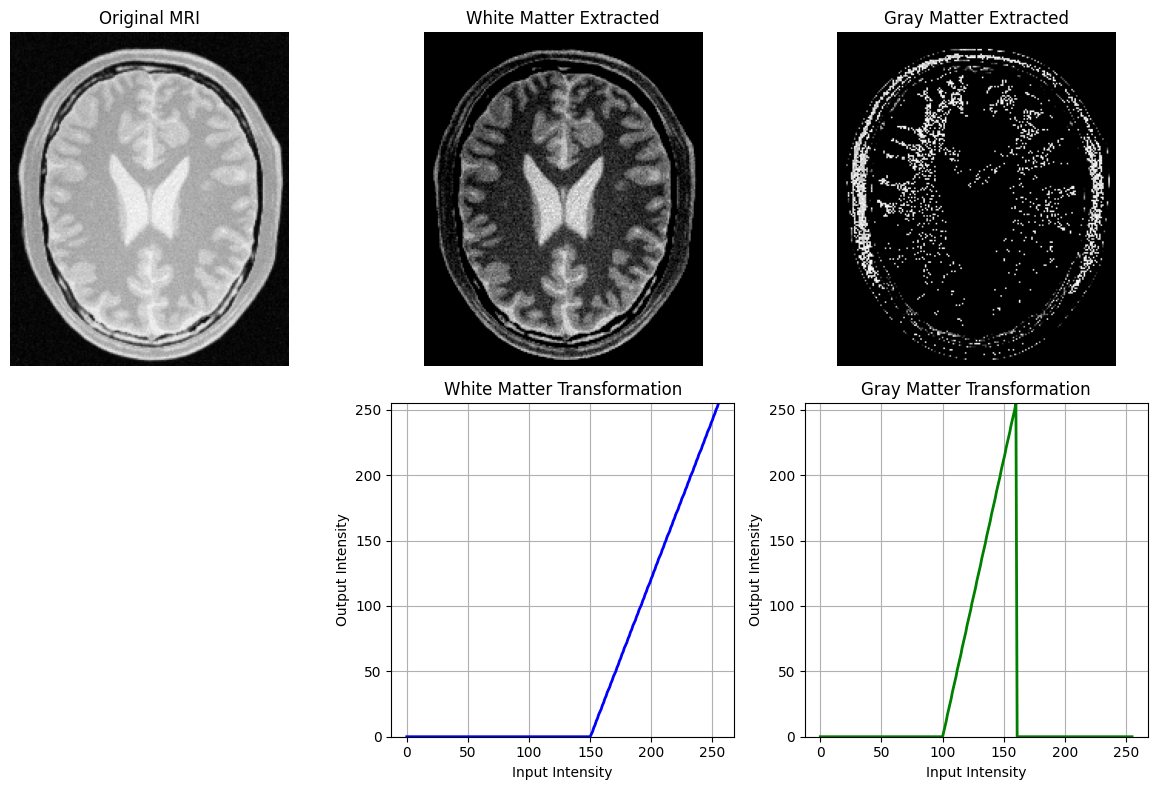

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read MRI in grayscale
img = cv2.imread("images/a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
x = np.arange(256)

# White matter intensity range
white_low, white_high = 150, 255
lut_white = np.zeros_like(x, dtype=np.uint8)
lut_white[white_low:white_high+1] = np.linspace(0, 255, white_high - white_low + 1)

# Gray matter intensity range
gray_low, gray_high = 100, 160
lut_gray = np.zeros_like(x, dtype=np.uint8)
lut_gray[gray_low:gray_high+1] = np.linspace(0, 255, gray_high - gray_low + 1)

# Apply transformations
white_enhanced = cv2.LUT(img, lut_white)
gray_enhanced = cv2.LUT(img, lut_gray)

# Plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original MRI")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(white_enhanced, cmap='gray')
plt.title("White Matter Extracted")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(gray_enhanced, cmap='gray')
plt.title("Gray Matter Extracted")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.plot(x, lut_white, color="blue", linewidth=2)
plt.title("White Matter Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.ylim(0, 255)

plt.subplot(2, 3, 6)
plt.plot(x, lut_gray, color="green", linewidth=2)
plt.title("Gray Matter Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()
